ROC Curve
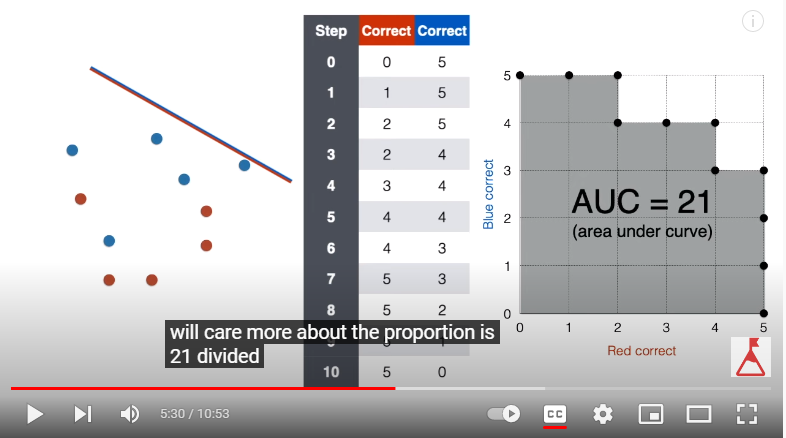
Here 21/25(total squares)=0.84(area under curve)
Move this line by and by up and consider all the red points correct that are below line so initially red score is zero and blue is five.

Area under curve will be between 0 and 1 and the higher the curve the better the model is.


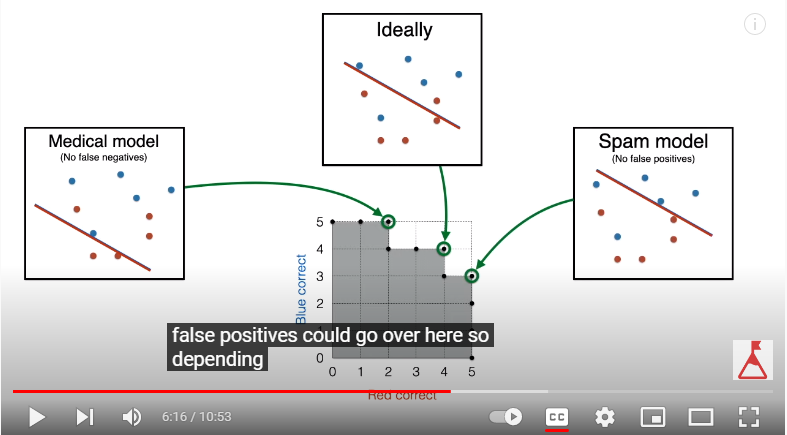

## **The above text can be considered as comments. It was just for learning purpose. The application is done below.**

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import neighbors,metrics
from matplotlib import ticker
import seaborn as sns
import warnings

# options
warnings.filterwarnings('ignore')

In [53]:
from google.colab import drive
drive.mount('/content/gdrive')
path = 'gdrive/My Drive/car.data'
data = pd.read_csv(path)
train = pd.read_csv('gdrive/My Drive/train.csv')
test = pd.read_csv('gdrive/My Drive/test.csv')
submission = pd.read_csv('gdrive/My Drive/sample_submission.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


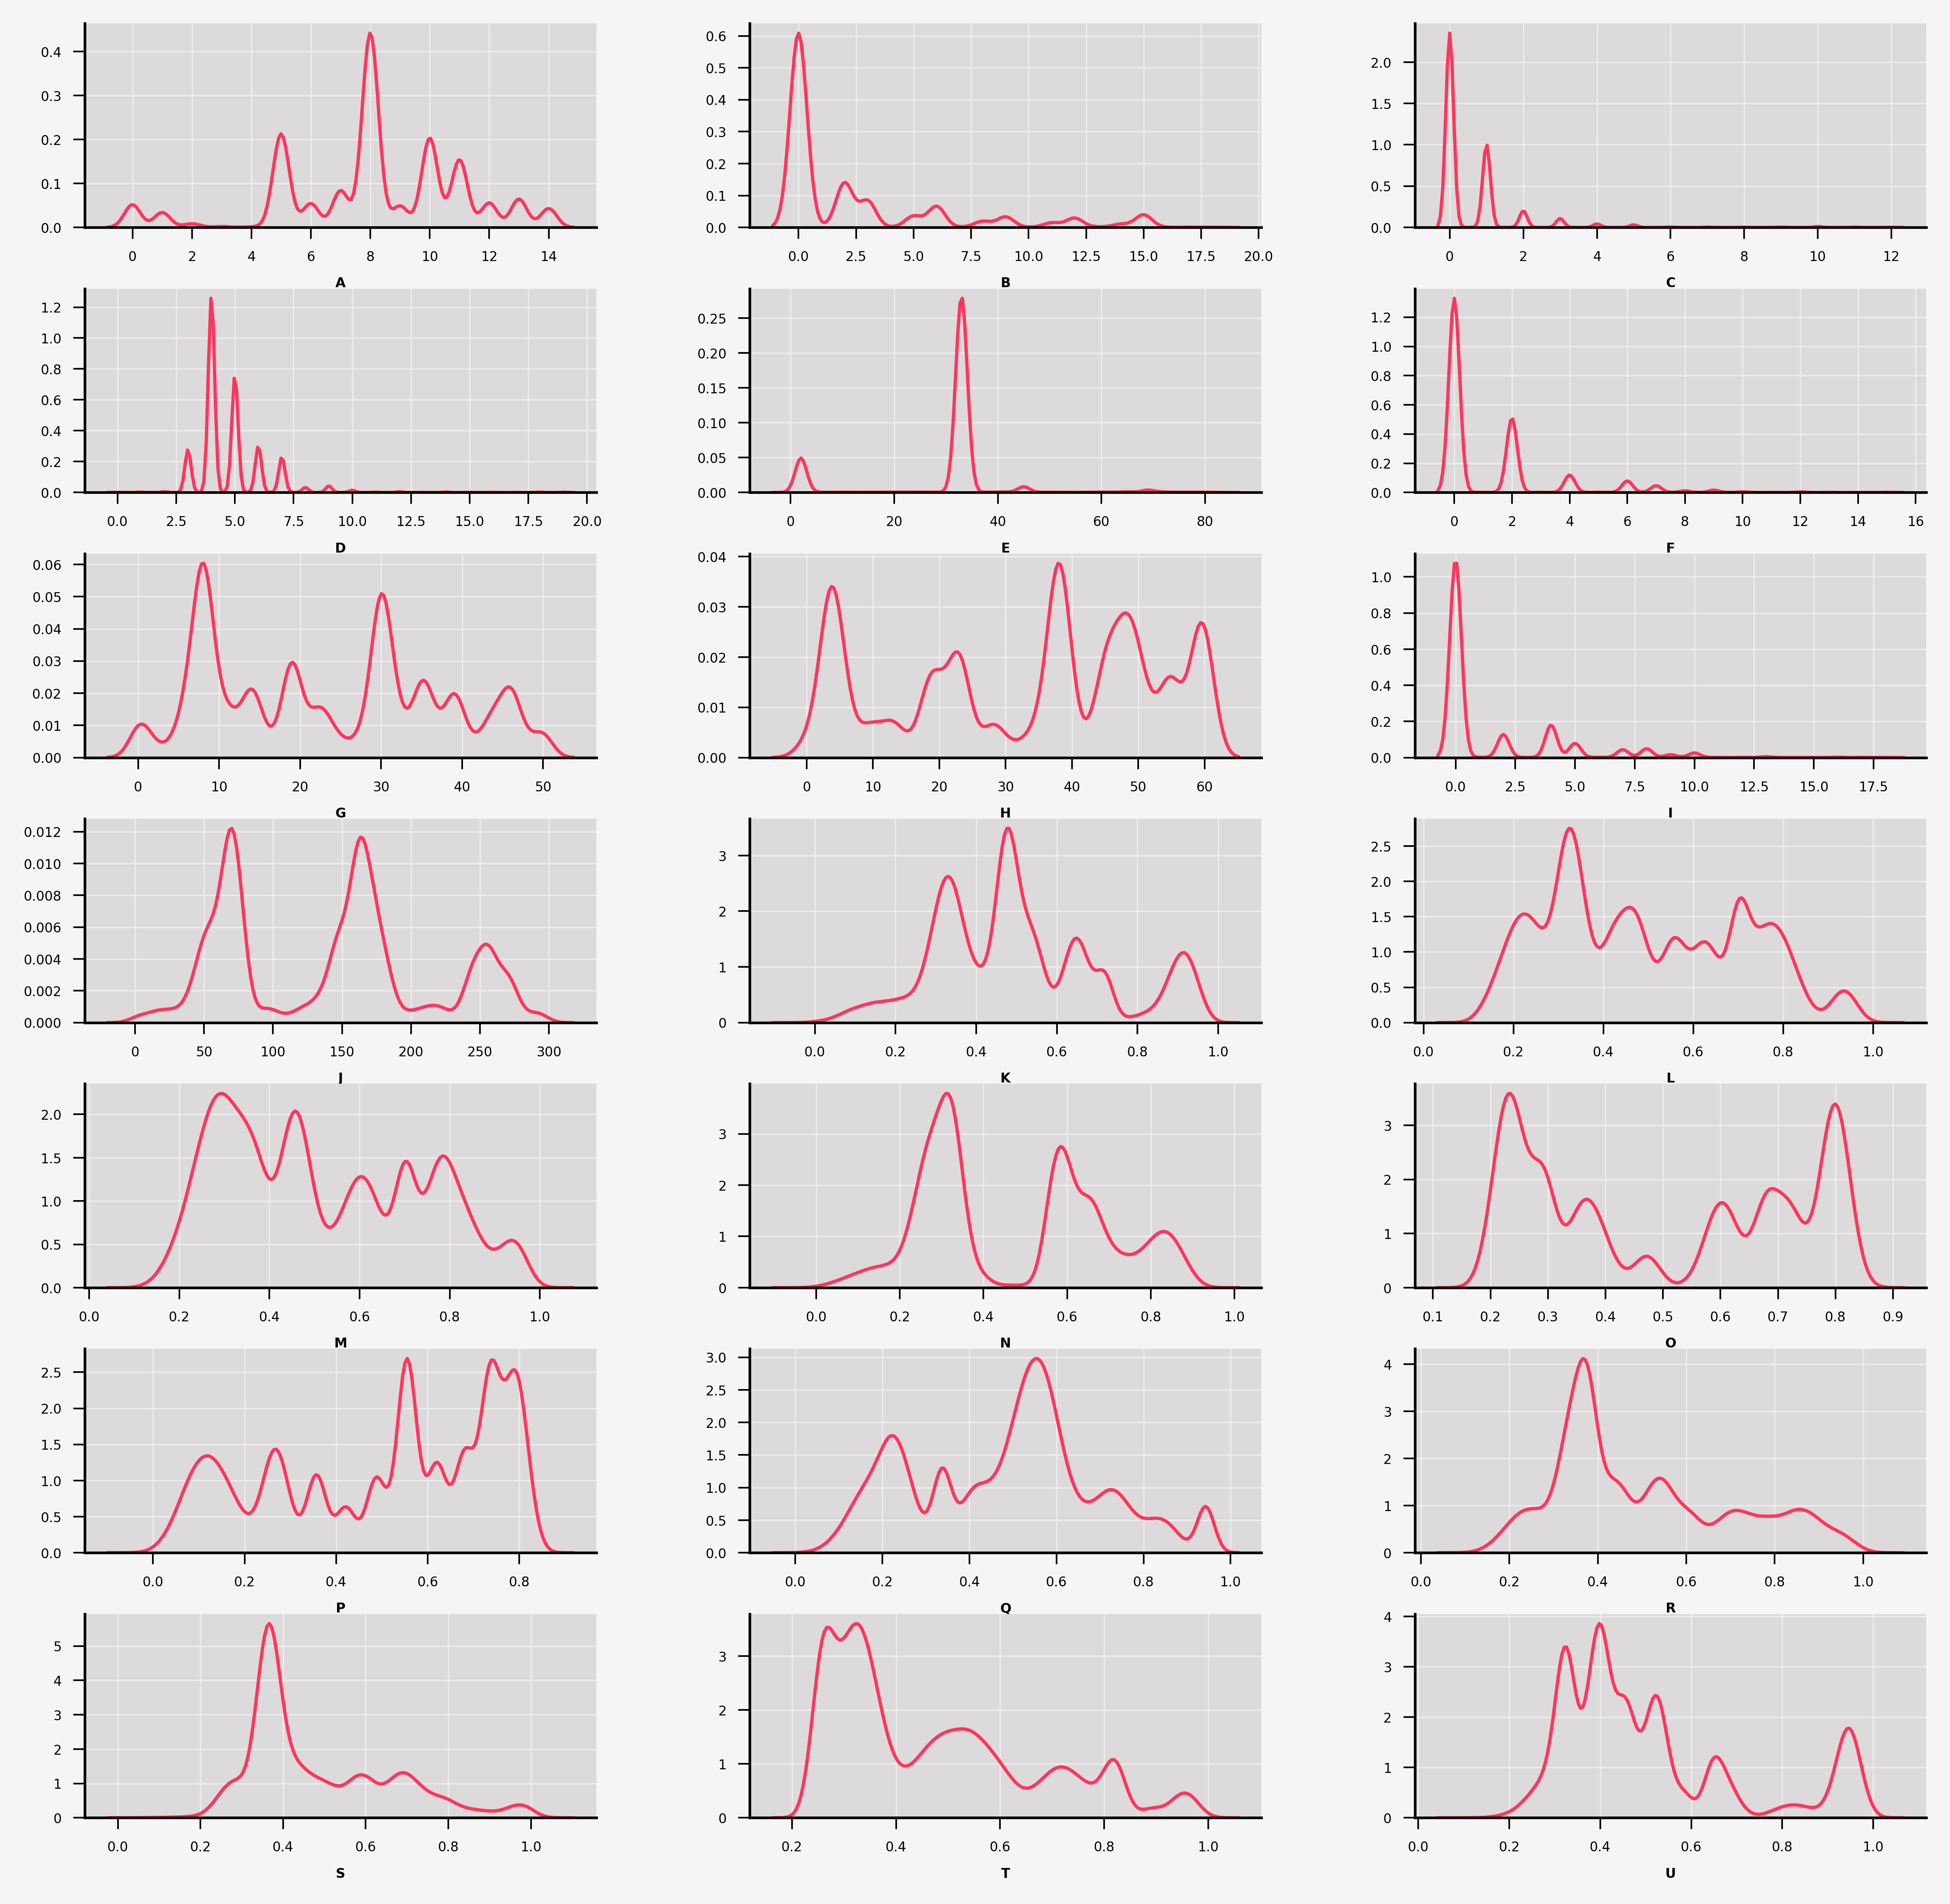

In [34]:
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(10, 10), facecolor='#f6f5f5')
gs = fig.add_gridspec(7, 3)
gs.update(wspace=0.3, hspace=0.3)
background_color = "#dcdada"

run_no = 0
for row in range(0, 7):
    for col in range(0, 3):
        locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(run_no)].set_facecolor(background_color)
        for s in ["top","right"]:
            locals()["ax"+str(run_no)].spines[s].set_visible(False)
        run_no += 1  

features_num = list([col for col in train.select_dtypes(exclude=object).columns if col not in ['ID', 'mutation']])

run_no = 0
for col in features_num:
    sns.kdeplot(ax=locals()["ax"+str(run_no)], x=train[col], zorder=2, alpha=1, linewidth=1, color='#FF355D')
    locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].set_ylabel('')
    locals()["ax"+str(run_no)].set_xlabel(col, fontsize=4, fontweight='bold')
    locals()["ax"+str(run_no)].tick_params(labelsize=4, width=0.5)
    locals()["ax"+str(run_no)].xaxis.offsetText.set_fontsize(4)
    locals()["ax"+str(run_no)].yaxis.offsetText.set_fontsize(4)
    run_no += 1

plt.show()

<Figure size 500x500 with 0 Axes>

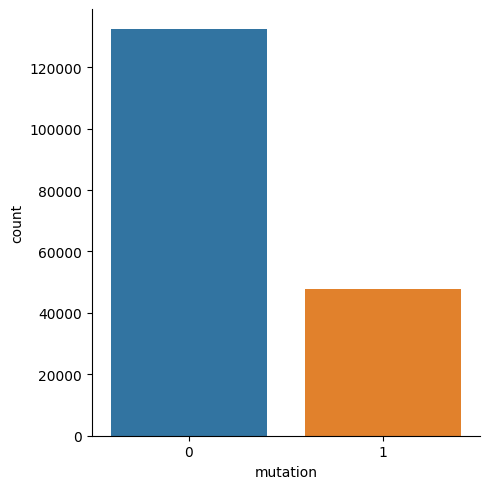

In [35]:
plt.rcParams['figure.dpi'] = 100
fig = plt.figure(figsize=(5, 5), facecolor='#f6f5f5')
background_color = "#dcdada"
fig = sns.catplot(x="mutation",data=train, kind="count")

In [36]:
sequence=train[['sequence1','sequence2','sequence3','sequence4','sequence5','sequence6','sequence7','sequence8','sequence9']].values
Label=train[['mutation']]

In [37]:
Le = LabelEncoder()
for i in range(len(sequence[0])):
  sequence[:,i] = Le.fit_transform(sequence[:,i])
print(sequence)

[[0 0 0 ... 1 1 0]
 [0 0 1 ... 1 1 0]
 [0 0 0 ... 1 1 0]
 ...
 [0 1 0 ... 0 1 1]
 [1 0 0 ... 2 1 2]
 [0 0 0 ... 1 1 0]]


In [43]:
knn = neighbors.KNeighborsClassifier(n_neighbors=25,weights='uniform')
X_train,X_test,y_train,y_test=train_test_split(sequence,Label,test_size=0.2)
knn.fit(X_train,y_train)
prediction=knn.predict(X_test)
accuracy=metrics.accuracy_score(y_test,prediction)
print(prediction)
print(accuracy)

[0 0 0 ... 0 0 0]
0.8264166666666667


In [46]:
sequence1=test[['sequence1','sequence2','sequence3','sequence4','sequence5','sequence6','sequence7','sequence8','sequence9']].values
Le = LabelEncoder()
for i in range(len(sequence1[0])):
  sequence1[:,i] = Le.fit_transform(sequence1[:,i])
pred = knn.predict(sequence1)

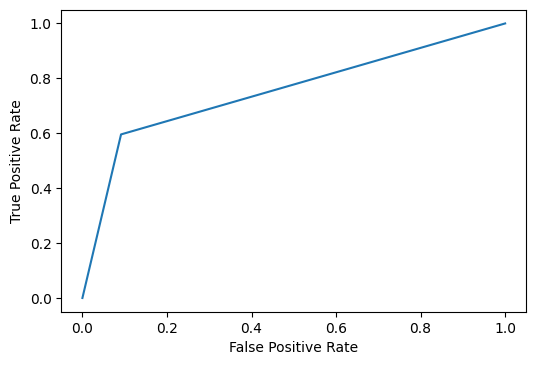

In [57]:
fpr, tpr, _ = metrics.roc_curve(y_test,  prediction)     #for train test data

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [56]:
submission['mutation'] = pred
submission.to_csv('submission.csv', index=False)
from google.colab import files
files.download("submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>